In [1]:
# Câu 1 :Dùng Pandas đọc file.

import pandas as pd
heiwei=pd.read_csv('./weight-height.csv')
heiwei.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2]:
# Câu 2 :Đọc dữ liệu từ file đó và chuyển 2 cột Height và Weight từ inch và pound về cm và kg. In ra Head().

heiwei['Height']=2.54*heiwei['Height'] #inch to cm
heiwei['Weight']=0.45359237*heiwei['Weight'] #pound to kg
heiwei.head()

,Gender,Height,Weight
0,Male,187.571423,109.721075
1,Male,174.706036,73.622792
2,Male,188.239668,96.497629
3,Male,182.196685,99.809586
4,Male,177.499761,93.598695


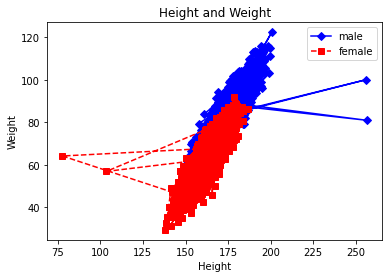

In [3]:
# Câu 3:Vẽ dữ liệu lên trục toạ độ với 2 màu sắc khác nhau biểu thị cho 2 giới tính.

import matplotlib.pyplot as plt
malesd = heiwei[heiwei.Gender == 'Male']
femalesd= heiwei[heiwei.Gender == 'Female']
plt.title('Height and Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.plot(malesd['Height'], malesd['Weight'], 'bD-', label='male')
plt.plot(femalesd['Height'], femalesd['Weight'], 'rs--', label='female')
plt.legend()
plt.show()

w1 using Sklearn library is: 1.3440958343319354
w0 using Sklearn library is: -153.3519860587032
R2 score: 0.8366756438048346


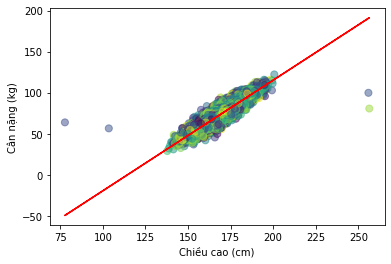

In [4]:
# Câu 4:Tạo mô hình Hồi quy tuyến tính cho tập dữ liệu trên dùng Sklearn. Với đầu vào là chiều cao, dữ liệu nhãn là cân nặng.

import numpy as np
import matplotlib.pyplot as plt

x=np.array(heiwei['Height'].values)
y=np.array(heiwei['Weight'].values)

n = np.size(x)
colors = np.random.rand(n)
area = 50
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân nặng (kg)')
plt.scatter(x, y, area, colors, alpha=0.5) #(x,y,kích thước chấm,màu,mờ)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.reshape(-1,1), y)
print('w1 using Sklearn library is:', reg.coef_[0])
print('w0 using Sklearn library is:', reg.intercept_)

from sklearn.metrics import r2_score
y_pred = reg.intercept_ + reg.coef_[0]*x
r2Score = r2_score(y, y_pred)
print('R2 score:', r2Score)
plt.plot(x, y_pred, color = "r")

Tạo độ (x,y) la ( 255.9440396637097 , 100.09787583519599 )
Tạo độ (x,y) la ( 256.44695681932853 , 80.98945800842263 )
Tạo độ (x,y) la ( 77.71987536399529 , 64.17317341698788 )
Tạo độ (x,y) la ( 103.49086789677658 , 56.90250200030381 )


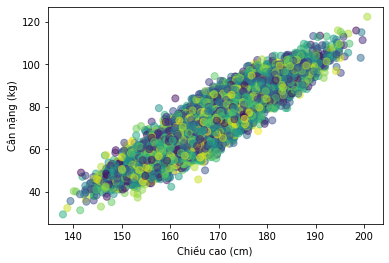

In [5]:
# Bài 5: Tìm toạ độ nhiễu, in ra và loại bỏ nhiễu

e=y-y_pred
import array as arr
x_array = arr.array('d',x)
y_array = arr.array('d',y)
for i in range (len(e)):
    if (e[i]>=70 or e[i]<=-70):
        print('Tạo độ (x,y) la (',x[i],',',y[i],')') 
        heiwei=heiwei.drop([i])
        x_array.remove(x[i])
        y_array.remove(y[i])
colors_array = np.random.rand(np.size(x_array))
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân nặng (kg)')
plt.scatter(x_array, y_array, 50, colors_array, alpha=0.5) #(x,y,kích thước chấm,màu,mờ)       

In [6]:
# Câu 6 : Chia dữ liệu thành 2 phần train_set (80%) và test_set (20%) chia đều cho cả 2 giới tính.
# (in ra số lượng dữ liệu cho nam và nữ ở 2 tập dữ liệu trên)

male = heiwei[heiwei.Gender == 'Male']
female= heiwei[heiwei.Gender == 'Female']

male4d5=male[0:int(len(male)*4/5)]
female4d5=female[0:int(len(female)*4/5)]
train_set = male4d5.append(female4d5, sort=True)

male1d5=male[int(len(male)*4/5):len(male)]
female1d5=female[int(len(female)*4/5):len(female)]
test_set = male1d5.append(female1d5, sort=True)

print('Dữ liệu trong train_set la')
print(train_set['Gender'].value_counts())
print('\nDữ liệu trong test_set la')
print(test_set['Gender'].value_counts())

Dữ liệu trong train_set la
Male      3998
Female    3998
Name: Gender, dtype: int64

Dữ liệu trong test_set la
Male      1000
Female    1000
Name: Gender, dtype: int64


R2 score of train_set :: 0.8551044684509723


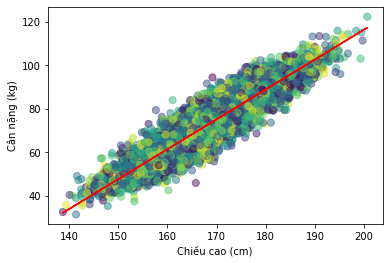

In [7]:
# Câu 7 :Tạo mô hình Hồi quy tuyến tính cho tập train_set và tính R2_score (dùng sklearn).

xtrain=np.array(train_set['Height'].values)
ytrain=np.array(train_set['Weight'].values)

ntrain = np.size(xtrain)
colorstrain = np.random.rand(ntrain)
areatrain = 50
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân nặng (kg)')
plt.scatter(xtrain, ytrain, areatrain, colorstrain,alpha=0.5)

reg_train = LinearRegression().fit(xtrain.reshape(-1,1), ytrain)

y_pred_train = reg_train.intercept_ + reg_train.coef_[0]*xtrain
r2Score_train = r2_score(ytrain, y_pred_train)
print('R2 score of train_set ::', r2Score_train)
plt.plot(xtrain, y_pred_train, color = "r")

In [8]:
# Câu 8:Tính điểm R2_score cho tập test_set.

xtest=np.array(test_set['Height'].values)
ytest=np.array(test_set['Weight'].values)

reg_test = LinearRegression().fit(xtrain.reshape(-1,1), ytrain)

y_pred_test = reg_test.intercept_ + reg_test.coef_[0]*xtest
r2Score_test = r2_score(ytest, y_pred_test)
print('R2 score of test_set :', r2Score_test)

R2 score of test_set : 0.8552811414072159


In [18]:
# Bài 9:Viết Hàm để nhập chiều cao, cân nặng sau đó dự đoán tình trạng người đó như thế nào, dựa trên sai số,
# nếu sai số càng thấp thì cơ thể càng cân đối
def tinhtrang():
    hei=float(input('Nhập chiều cao : '))
    wei=float(input('Nhập cân nặng : '))
    wei_pred = hei*reg.coef_[0]+reg.intercept_#hei*w1+w0
    saiso=wei-wei_pred
    if (saiso<-10):
        return 'Quá gầy'
    elif (saiso<-5): 
        return 'Hơi gầy'
    elif(saiso<5):
        return 'Cân đối'
    elif(saiso<10):
        return 'Hơi thừa cân'
    else:
        return 'Thừa cân'
x=tinhtrang()
x    

Nhập chiều cao : 170
Nhập cân nặng : 75


'Cân đối'

In [14]:
# Ước lượng để lấy khoảng sai số
heiwei['Tinh trang']=heiwei['Weight']-(heiwei['Height']*reg.coef_[0]+reg.intercept_)#hei*w1+w0
print(heiwei.to_string())

      Gender      Height      Weight  Tinh trang
0       Male  187.571423  109.721075   10.959092
1       Male  174.706036   73.622792   -7.846878
2       Male  188.239668   96.497629   -3.162538
3       Male  182.196685   99.809586    8.271766
4       Male  177.499761   93.598695    8.373991
5       Male  170.822660   69.042272   -7.207767
6       Male  174.714106   83.428287    1.947770
7       Male  173.605229   76.190414   -3.799665
8       Male  170.228132   79.800252    4.349315
9       Male  161.179495   70.941700    7.652999
10      Male  180.836271   84.642570   -5.066722
11      Male  181.967645   96.951364    5.721396
12      Male  164.506476   75.807741    8.047258
13      Male  175.978998   85.931342    2.750690
14      Male  175.879080   84.565116    1.518764
15      Male  171.819874   78.102678    0.512287
16      Male  183.942524   88.917035   -4.967360
17      Male  162.494787   78.418623   13.362042
18      Male  176.885752   84.360904   -0.038512
19      Male  172.55